In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import math


In [2]:
titanic=pd.read_csv('titanic.csv')

In [3]:
titanic.head(5)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [4]:
print("# of passengers in original data:"+str(len(titanic.index)))

# of passengers in original data:1309


In [5]:
#analyze the data
titanic.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')

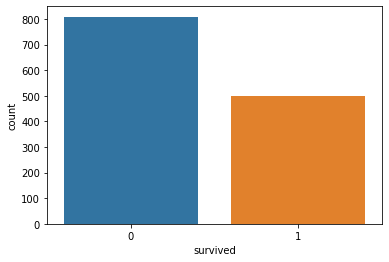

In [6]:
sns.countplot(x="survived",data=titanic)

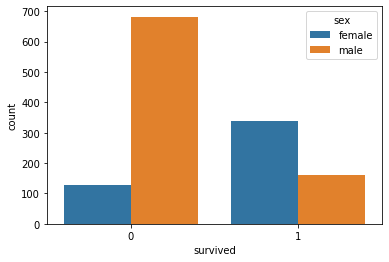

In [7]:
 sns.countplot(x="survived",hue="sex",data=titanic)

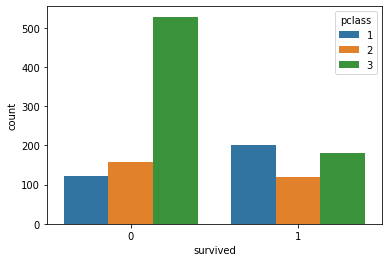

In [56]:
sns.countplot(x="survived",hue="pclass",data=titanic)

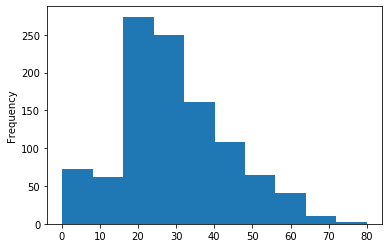

In [8]:
titanic["age"].plot.hist()

In [11]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [79]:
#data wrangling

titanic.isnull()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,False,False,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,False,True,True,False
3,False,False,False,False,False,False,False,False,False,False,False,True,False,False
4,False,False,False,False,False,False,False,False,False,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,False,False,False,False,False,False,False,False,False,True,False,True,False,True
1305,False,False,False,False,True,False,False,False,False,True,False,True,True,True
1306,False,False,False,False,False,False,False,False,False,True,False,True,False,True
1307,False,False,False,False,False,False,False,False,False,True,False,True,True,True


In [4]:
titanic.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

In [5]:
#Dopping cabin column beacuse its no use
titanic.drop("cabin",axis=1,inplace=True)

In [6]:
titanic.drop("body",axis=1,inplace=True)

In [7]:
titanic.drop("home.dest",axis=1,inplace=True)

In [8]:
titanic.head(5)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,boat
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,S,2
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,S,11
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,S,NaN
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,S,NaN
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,S,NaN


In [56]:
titanic.isnull().sum()

pclass        0
survived      0
name          0
sex           0
age         263
sibsp         0
parch         0
ticket        0
fare          1
embarked      2
boat        823
dtype: int64

In [9]:
titanic.dropna(inplace=True)

In [10]:
titanic.isnull().sum()

pclass      0
survived    0
name        0
sex         0
age         0
sibsp       0
parch       0
ticket      0
fare        0
embarked    0
boat        0
dtype: int64

In [11]:
titanic.shape

(415, 11)

In [12]:
sex= pd.get_dummies(titanic["sex"],drop_first=True)
sex.head(5)

,male
0,0
1,1
5,1
6,0
8,0


In [13]:
embark= pd.get_dummies(titanic["embarked"],drop_first=True)
embark.head(5)


,Q,S
0,0,1
1,0,1
5,0,1
6,0,1
8,0,1


In [17]:
embark= pd.get_dummies(titanic["embarked"],drop_first=True)
embark.head(5)

,Q,S
0,0,1
1,0,1
5,0,1
6,0,1
8,0,1


In [14]:
pcl= pd.get_dummies(titanic["pclass"],drop_first=True)
pcl.head(5)

,2,3
0,0,0
1,0,0
5,0,0
6,0,0
8,0,0


In [15]:
 titanic=pd.concat([titanic,sex,embark,pcl],axis=1)

In [16]:
titanic.head(5)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,boat,male,Q,S,2,3
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,S,2,0,0,1,0,0
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,S,11,1,0,1,0,0
5,1,1,"Anderson, Mr. Harry",male,48.00,0,0,19952,26.5500,S,3,1,0,1,0,0
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.00,1,0,13502,77.9583,S,10,0,0,1,0,0
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.00,2,0,11769,51.4792,S,D,0,0,1,0,0


In [36]:
titanic.columns

Index([  'pclass', 'survived',     'name',      'sex',      'age',    'sibsp',
          'parch',   'ticket',     'fare', 'embarked',     'boat',     'male',
              'Q',        'S',          2,          3],
      dtype='object')

In [17]:
titanic.drop(['sex','embarked','name','ticket'],axis=1,inplace=True)

In [18]:
titanic.head()

,pclass,survived,age,sibsp,parch,fare,boat,male,Q,S,2,3
0,1,1,29.00,0,0,211.3375,2,0,0,1,0,0
1,1,1,0.92,1,2,151.5500,11,1,0,1,0,0
5,1,1,48.00,0,0,26.5500,3,1,0,1,0,0
6,1,1,63.00,1,0,77.9583,10,0,0,1,0,0
8,1,1,53.00,2,0,51.4792,D,0,0,1,0,0


In [19]:
titanic.drop('pclass',axis=1,inplace=True)


In [20]:
titanic.head()

,survived,age,sibsp,parch,fare,boat,male,Q,S,2,3
0,1,29.00,0,0,211.3375,2,0,0,1,0,0
1,1,0.92,1,2,151.5500,11,1,0,1,0,0
5,1,48.00,0,0,26.5500,3,1,0,1,0,0
6,1,63.00,1,0,77.9583,10,0,0,1,0,0
8,1,53.00,2,0,51.4792,D,0,0,1,0,0


In [22]:
titanic.drop('boat',axis=1,inplace=True)


In [23]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 415 entries, 0 to 1299
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  415 non-null    int64  
 1   age       415 non-null    float64
 2   sibsp     415 non-null    int64  
 3   parch     415 non-null    int64  
 4   fare      415 non-null    float64
 5   male      415 non-null    uint8  
 6   Q         415 non-null    uint8  
 7   S         415 non-null    uint8  
 8   2         415 non-null    uint8  
 9   3         415 non-null    uint8  
dtypes: float64(2), int64(3), uint8(5)
memory usage: 21.5 KB


In [24]:
#Train data
X= titanic.iloc[:, 1:].values
y= titanic.iloc[:, 0].values

In [25]:
X

array([[29.  ,  0.  ,  0.  , ...,  1.  ,  0.  ,  0.  ],
       [ 0.92,  1.  ,  2.  , ...,  1.  ,  0.  ,  0.  ],
       [48.  ,  0.  ,  0.  , ...,  1.  ,  0.  ,  0.  ],
       ...,
       [22.  ,  0.  ,  0.  , ...,  0.  ,  0.  ,  1.  ],
       [38.  ,  0.  ,  0.  , ...,  0.  ,  0.  ,  1.  ],
       [27.  ,  1.  ,  0.  , ...,  0.  ,  0.  ,  1.  ]])

In [26]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [27]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state=1)

In [35]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [42]:
X_train

array([[ 0.15745497, -0.6754728 , -0.69199357, ...,  0.7533708 ,
         1.66319986, -0.62254302],
       [ 1.42061597, -0.6754728 , -0.69199357, ...,  0.7533708 ,
         1.66319986, -0.62254302],
       [-0.8397774 , -0.6754728 ,  0.50967191, ..., -1.32736761,
        -0.60125065, -0.62254302],
       ...,
       [ 0.02449065, -0.6754728 , -0.69199357, ...,  0.7533708 ,
        -0.60125065,  1.6063147 ],
       [-1.70404546,  0.83135113,  1.71133739, ..., -1.32736761,
         1.66319986, -0.62254302],
       [ 0.48986576,  0.83135113,  1.71133739, ...,  0.7533708 ,
        -0.60125065, -0.62254302]])

In [36]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [37]:
lg= LogisticRegression()

In [38]:
lg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [39]:
pred_y = lg.predict(X_test)

In [40]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, pred_y)
print(cm)

[[  0   2]
 [  0 123]]


In [41]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,pred_y)

0.984